In [215]:
import os
print(os.path.abspath('.'))


E:\2022_MCM\2022_A\2022_A_solution


In [292]:
import pandas as pd
data_root=r'E:\2022_MCM\2022_A\2022_A_solution\Fuji_TT_Circuit.xlsx'
#data_root=r'E:\2022_MCM\2022_A\2022_A_solution\flanders.xlsx'
#pacifier_root=os.path.join(data_root,'Fuji_TT_Circuit.xlsx')
pre_circuit_data = pd.read_csv('uci_data.csv')
#circuit_data = pd.read_excel(data_root)
#circuit_data.head()
#pacifier_data

In [293]:
circuit_data=pre_circuit_data.drop([x for x in range(len(pre_circuit_data)) if x%5 ],axis=0)

In [294]:
circuit_data.head()

UNIX TIME                  TIME        LAT      LONG    ALT      DIST  \
0   1179727200  2007-05-21T06:00:00Z  51.205254  3.217229  8.856  0.000000   
5   1179727202  2007-05-21T06:00:02Z  51.205307  3.217212  8.931  0.006314   
10  1179727204  2007-05-21T06:00:04Z  51.205361  3.217192  9.012  0.012843   
15  1179727207  2007-05-21T06:00:07Z  51.205413  3.217178  9.076  0.019185   
20  1179727208  2007-05-21T06:00:08Z  51.205445  3.217165  9.124  0.023154   

    HR  CAD     TEMP    POWER  
0    0    0  No Data  No Data  
5    0    0  No Data  No Data  
10   0    0  No Data  No Data  
15   0    0  No Data  No Data  
20   0    0  No Data  No Data

In [295]:
circuit_data=circuit_data.drop_duplicates('LAT',keep='first')
circuit_data =  circuit_data.reset_index(drop=True) 
circuit_data

UNIX TIME                  TIME        LAT      LONG     ALT  \
0     1179727200  2007-05-21T06:00:00Z  51.205254  3.217229   8.856   
1     1179727202  2007-05-21T06:00:02Z  51.205307  3.217212   8.931   
2     1179727204  2007-05-21T06:00:04Z  51.205361  3.217192   9.012   
3     1179727207  2007-05-21T06:00:07Z  51.205413  3.217178   9.076   
4     1179727208  2007-05-21T06:00:08Z  51.205445  3.217165   9.124   
...          ...                   ...        ...       ...     ...   
1563  1179742916  2007-05-21T10:21:56Z  51.349217  3.278784  11.092   
1564  1179742931  2007-05-21T10:22:11Z  51.349060  3.278264   9.218   
1565  1179742944  2007-05-21T10:22:24Z  51.348920  3.277805   9.482   
1566  1179742950  2007-05-21T10:22:30Z  51.348866  3.277586   9.973   
1567  1179742962  2007-05-21T10:22:42Z  51.349114  3.277324   6.032   

           DIST  HR  CAD     TEMP    POWER  
0      0.000000   0    0  No Data  No Data  
1      0.006314   0    0  No Data  No Data  
2      0.012843   0    0  No Data  No Data  
3      0.019185   0    0  No Data  No Data  
4      0.023154   0    0  No Data  No Data  
...         ...  ..  ...      ...      ...  
1563  43.656780   0    0  No Data  No Data  
1564  43.697160   0    0  No Data  No Data  
1565  43.732620   0    0  No Data  No Data  
1566  43.749090   0    0  No Data  No Data  
1567  43.782400   0    0  No Data  No Data  

[1568 rows x 10 columns]

In [296]:
circuit_data['POSITION'] = pd.Series(zip(circuit_data['LAT'],circuit_data['LONG'],circuit_data['ALT']))
circuit_data.head()

UNIX TIME                  TIME        LAT      LONG    ALT      DIST  HR  \
0  1179727200  2007-05-21T06:00:00Z  51.205254  3.217229  8.856  0.000000   0   
1  1179727202  2007-05-21T06:00:02Z  51.205307  3.217212  8.931  0.006314   0   
2  1179727204  2007-05-21T06:00:04Z  51.205361  3.217192  9.012  0.012843   0   
3  1179727207  2007-05-21T06:00:07Z  51.205413  3.217178  9.076  0.019185   0   
4  1179727208  2007-05-21T06:00:08Z  51.205445  3.217165  9.124  0.023154   0   

   CAD     TEMP    POWER                      POSITION  
0    0  No Data  No Data  (51.205254, 3.217229, 8.856)  
1    0  No Data  No Data  (51.205307, 3.217212, 8.931)  
2    0  No Data  No Data  (51.205361, 3.217192, 9.012)  
3    0  No Data  No Data  (51.205413, 3.217178, 9.076)  
4    0  No Data  No Data  (51.205445, 3.217165, 9.124)

In [297]:
import math

def geo2xyz(lat, lng, r=6400):
    '''
    将地理经纬度转换成笛卡尔坐标系
    :param lat: 纬度
    :param lng: 经度
    :param r: 地球半径
    :return: 返回笛卡尔坐标系
    '''
    thera = (math.pi * lat) / 180
    fie = (math.pi * lng) / 180
    x = r * math.cos(thera) * math.cos(fie)
    y = r * math.cos(thera) * math.sin(fie)
    z = r * math.sin(thera)
    return [x,y,z]

def get_angle(l1, l2, l3):
    '''
    :param l1: 经纬度
    :param l2: 顶点经纬度
    :param l3: 经纬度
    :return: 线段l2-l1 与 l3-l2之间的角度
    '''
    p1 = geo2xyz(l1[0], l1[1])
    p2 = geo2xyz(l2[0], l2[1])
    p3 = geo2xyz(l3[0], l3[1])

    _P1P2 = math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2 + (p2[2] - p1[2]) ** 2)
    _P2P3 = math.sqrt((p3[0] - p2[0]) ** 2 + (p3[1] - p2[1]) ** 2 + (p3[2] - p2[2]) ** 2)
    P = (p2[0] - p1[0]) * (p3[0] - p2[0]) + (p2[1] - p1[1]) * (p3[1] - p2[1]) + (p2[2] - p1[2]) * (p3[2] - p2[2])
    angle = (math.acos(P / (_P1P2 * _P2P3)) / math.pi) * 180
    return angle


In [298]:
circuit_data['xyz_POSITION']=circuit_data['POSITION'].apply(lambda x:geo2xyz(x[0],x[1]))
circuit_data

UNIX TIME                  TIME        LAT      LONG     ALT  \
0     1179727200  2007-05-21T06:00:00Z  51.205254  3.217229   8.856   
1     1179727202  2007-05-21T06:00:02Z  51.205307  3.217212   8.931   
2     1179727204  2007-05-21T06:00:04Z  51.205361  3.217192   9.012   
3     1179727207  2007-05-21T06:00:07Z  51.205413  3.217178   9.076   
4     1179727208  2007-05-21T06:00:08Z  51.205445  3.217165   9.124   
...          ...                   ...        ...       ...     ...   
1563  1179742916  2007-05-21T10:21:56Z  51.349217  3.278784  11.092   
1564  1179742931  2007-05-21T10:22:11Z  51.349060  3.278264   9.218   
1565  1179742944  2007-05-21T10:22:24Z  51.348920  3.277805   9.482   
1566  1179742950  2007-05-21T10:22:30Z  51.348866  3.277586   9.973   
1567  1179742962  2007-05-21T10:22:42Z  51.349114  3.277324   6.032   

           DIST  HR  CAD     TEMP    POWER                       POSITION  \
0      0.000000   0    0  No Data  No Data   (51.205254, 3.217229, 8.856)   
1      0.006314   0    0  No Data  No Data   (51.205307, 3.217212, 8.931)   
2      0.012843   0    0  No Data  No Data   (51.205361, 3.217192, 9.012)   
3      0.019185   0    0  No Data  No Data   (51.205413, 3.217178, 9.076)   
4      0.023154   0    0  No Data  No Data   (51.205445, 3.217165, 9.124)   
...         ...  ..  ...      ...      ...                            ...   
1563  43.656780   0    0  No Data  No Data  (51.349217, 3.278784, 11.092)   
1564  43.697160   0    0  No Data  No Data    (51.34906, 3.278264, 9.218)   
1565  43.732620   0    0  No Data  No Data    (51.34892, 3.277805, 9.482)   
1566  43.749090   0    0  No Data  No Data   (51.348866, 3.277586, 9.973)   
1567  43.782400   0    0  No Data  No Data   (51.349114, 3.277324, 6.032)   

                                           xyz_POSITION  
0     [4003.487276962948, 225.0373313697861, 4988.13...  
1     [4003.48273685998, 225.03588455873575, 4988.13...  
2     [4003.4781216136244, 225.03422324270787, 4988....  
3     [4003.4736566422494, 225.0329909441994, 4988.1...  
4     [4003.4709261865364, 225.0319262381399, 4988.1...  
...                                                 ...  
1563  [3990.7177745475083, 228.62073869809012, 4998....  
1564  [3990.733522727189, 228.58530328473586, 4998.1...  
1565  [3990.747546673915, 228.55403156394345, 4998.1...  
1566  [3990.7531231966814, 228.53904716831153, 4998....  
1567  [3990.7325694118867, 228.51956159668276, 4998....  

[1568 rows x 12 columns]

In [299]:

direct=[]
for i in range(len(circuit_data)-1):
    x=circuit_data['POSITION'][i+1][0]-circuit_data['POSITION'][i][0]
    y=circuit_data['POSITION'][i+1][1]-circuit_data['POSITION'][i][1]
    direct.append((x,y))
    


x=circuit_data['POSITION'][0][0]-circuit_data['POSITION'][len(circuit_data)-1][0]
y=circuit_data['POSITION'][0][1]-circuit_data['POSITION'][len(circuit_data)-1][1]
direct.append((x,y))

#direct
#circuit_data['DIRECTION'][len(circuit_data)-1]=circuit_data['POSITION'][0]-circuit_data['POSITION'][len(circuit_data)-1]
circuit_data['DIRECTION']=direct
circuit_data.head()

UNIX TIME                  TIME        LAT      LONG    ALT      DIST  HR  \
0  1179727200  2007-05-21T06:00:00Z  51.205254  3.217229  8.856  0.000000   0   
1  1179727202  2007-05-21T06:00:02Z  51.205307  3.217212  8.931  0.006314   0   
2  1179727204  2007-05-21T06:00:04Z  51.205361  3.217192  9.012  0.012843   0   
3  1179727207  2007-05-21T06:00:07Z  51.205413  3.217178  9.076  0.019185   0   
4  1179727208  2007-05-21T06:00:08Z  51.205445  3.217165  9.124  0.023154   0   

   CAD     TEMP    POWER                      POSITION  \
0    0  No Data  No Data  (51.205254, 3.217229, 8.856)   
1    0  No Data  No Data  (51.205307, 3.217212, 8.931)   
2    0  No Data  No Data  (51.205361, 3.217192, 9.012)   
3    0  No Data  No Data  (51.205413, 3.217178, 9.076)   
4    0  No Data  No Data  (51.205445, 3.217165, 9.124)   

                                        xyz_POSITION  \
0  [4003.487276962948, 225.0373313697861, 4988.13...   
1  [4003.48273685998, 225.03588455873575, 4988.13...   
2  [4003.4781216136244, 225.03422324270787, 4988....   
3  [4003.4736566422494, 225.0329909441994, 4988.1...   
4  [4003.4709261865364, 225.0319262381399, 4988.1...   

                                          DIRECTION  
0   (5.300000000119098e-05, -1.700000000015578e-05)  
1  (5.400000000577165e-05, -2.0000000000131024e-05)  
2  (5.199999999661031e-05, -1.3999999999736445e-05)  
3  (3.199999999736747e-05, -1.3000000000040757e-05)  
4  (3.600000000147929e-05, -1.0000000000065512e-05)

In [300]:
import numpy as np
#wind_direct=2.356
circuit_data['DIRECTION_ANGLE']=list(map(lambda x : np.arctan(x[1]/x[0]), circuit_data['DIRECTION']))
circuit_data.head()                     

UNIX TIME                  TIME        LAT      LONG    ALT      DIST  HR  \
0  1179727200  2007-05-21T06:00:00Z  51.205254  3.217229  8.856  0.000000   0   
1  1179727202  2007-05-21T06:00:02Z  51.205307  3.217212  8.931  0.006314   0   
2  1179727204  2007-05-21T06:00:04Z  51.205361  3.217192  9.012  0.012843   0   
3  1179727207  2007-05-21T06:00:07Z  51.205413  3.217178  9.076  0.019185   0   
4  1179727208  2007-05-21T06:00:08Z  51.205445  3.217165  9.124  0.023154   0   

   CAD     TEMP    POWER                      POSITION  \
0    0  No Data  No Data  (51.205254, 3.217229, 8.856)   
1    0  No Data  No Data  (51.205307, 3.217212, 8.931)   
2    0  No Data  No Data  (51.205361, 3.217192, 9.012)   
3    0  No Data  No Data  (51.205413, 3.217178, 9.076)   
4    0  No Data  No Data  (51.205445, 3.217165, 9.124)   

                                        xyz_POSITION  \
0  [4003.487276962948, 225.0373313697861, 4988.13...   
1  [4003.48273685998, 225.03588455873575, 4988.13...   
2  [4003.4781216136244, 225.03422324270787, 4988....   
3  [4003.4736566422494, 225.0329909441994, 4988.1...   
4  [4003.4709261865364, 225.0319262381399, 4988.1...   

                                          DIRECTION  DIRECTION_ANGLE  
0   (5.300000000119098e-05, -1.700000000015578e-05)        -0.310387  
1  (5.400000000577165e-05, -2.0000000000131024e-05)        -0.354706  
2  (5.199999999661031e-05, -1.3999999999736445e-05)        -0.262995  
3  (3.199999999736747e-05, -1.3000000000040757e-05)        -0.385883  
4  (3.600000000147929e-05, -1.0000000000065512e-05)        -0.270947

In [301]:
wind_direct=(-1,1)
wind_direct=np.array(wind_direct)
circuit_data['WIND']=list(map(lambda x : np.arccos(np.array(x).dot(wind_direct)/(np.linalg.norm( np.array(x)) * np.linalg.norm(wind_direct))), circuit_data['DIRECTION']))
circuit_data.head()


UNIX TIME                  TIME        LAT      LONG    ALT      DIST  HR  \
0  1179727200  2007-05-21T06:00:00Z  51.205254  3.217229  8.856  0.000000   0   
1  1179727202  2007-05-21T06:00:02Z  51.205307  3.217212  8.931  0.006314   0   
2  1179727204  2007-05-21T06:00:04Z  51.205361  3.217192  9.012  0.012843   0   
3  1179727207  2007-05-21T06:00:07Z  51.205413  3.217178  9.076  0.019185   0   
4  1179727208  2007-05-21T06:00:08Z  51.205445  3.217165  9.124  0.023154   0   

   CAD     TEMP    POWER                      POSITION  \
0    0  No Data  No Data  (51.205254, 3.217229, 8.856)   
1    0  No Data  No Data  (51.205307, 3.217212, 8.931)   
2    0  No Data  No Data  (51.205361, 3.217192, 9.012)   
3    0  No Data  No Data  (51.205413, 3.217178, 9.076)   
4    0  No Data  No Data  (51.205445, 3.217165, 9.124)   

                                        xyz_POSITION  \
0  [4003.487276962948, 225.0373313697861, 4988.13...   
1  [4003.48273685998, 225.03588455873575, 4988.13...   
2  [4003.4781216136244, 225.03422324270787, 4988....   
3  [4003.4736566422494, 225.0329909441994, 4988.1...   
4  [4003.4709261865364, 225.0319262381399, 4988.1...   

                                          DIRECTION  DIRECTION_ANGLE      WIND  
0   (5.300000000119098e-05, -1.700000000015578e-05)        -0.310387  2.666582  
1  (5.400000000577165e-05, -2.0000000000131024e-05)        -0.354706  2.710900  
2  (5.199999999661031e-05, -1.3999999999736445e-05)        -0.262995  2.619189  
3  (3.199999999736747e-05, -1.3000000000040757e-05)        -0.385883  2.742077  
4  (3.600000000147929e-05, -1.0000000000065512e-05)        -0.270947  2.627141

In [302]:
pos =circuit_data['POSITION'].tolist()
angle=[]
for i in range(len(pos)-2):
    print(i)
    print(circuit_data['POSITION'][i])
    angle.append(get_angle(pos[i],pos[i+1],pos[i+2]))
angle  


0
(51.205254, 3.217229, 8.856)
1
(51.205307, 3.217212, 8.931)
2
(51.205361, 3.217192, 9.012)
3
(51.205413, 3.217178, 9.076)
4
(51.205445, 3.217165, 9.124)
5
(51.205481, 3.217155, 9.165)
6
(51.205515, 3.217142, 9.211)
7
(51.205549, 3.217129, 9.254)
8
(51.205592, 3.217115, 9.306)
9
(51.205624, 3.217105, 9.341)
10
(51.205651, 3.217092, 9.378)
11
(51.205696, 3.217077, 9.426)
12
(51.205723, 3.217072, 9.449)
13
(51.205786, 3.217049, 9.515)
14
(51.20583, 3.217034, 9.558)
15
(51.205865, 3.217029, 9.543)
16
(51.20589, 3.217033, 9.521)
17
(51.205911, 3.217028, 9.512)
18
(51.20596, 3.216992, 9.517)
19
(51.205987, 3.21698, 9.508)
20
(51.206013, 3.216968, 9.5)
21
(51.206052, 3.216955, 9.481)
22
(51.206086, 3.216941, 9.467)
23
(51.206123, 3.216917, 9.455)
24
(51.206176, 3.216898, 9.424)
25
(51.206233, 3.21688, 9.386)
26
(51.206313, 3.216838, 9.336)
27
(51.206388, 3.216803, 9.279)
28
(51.206464, 3.216766, 9.214)
29
(51.206532, 3.216735, 9.148)
30
(51.206573, 3.216718, 9.105)
31
(51.206595, 3.216709, 

(51.277238, 3.238197, 2.051)
930
(51.277173, 3.238033, 2.141)
931
(51.277101, 3.237794, 2.309)
932
(51.277059, 3.237562, 2.489)
933
(51.277011, 3.237342, 2.586)
934
(51.276947, 3.237142, 2.662)
935
(51.276894, 3.236946, 2.727)
936
(51.276835, 3.236699, 2.797)
937
(51.276767, 3.236475, 2.65)
938
(51.276713, 3.236304, 2.509)
939
(51.276682, 3.236128, 2.335)
940
(51.276646, 3.236006, 2.198)
941
(51.276603, 3.235882, 2.05)
942
(51.276546, 3.235741, 2.094)
943
(51.276502, 3.235609, 2.216)
944
(51.276441, 3.235443, 2.341)
945
(51.276397, 3.235295, 2.437)
946
(51.27636, 3.235147, 2.52)
947
(51.276329, 3.235025, 2.577)
948
(51.276288, 3.234877, 2.546)
949
(51.276223, 3.234609, 2.468)
950
(51.276125, 3.234244, 2.351)
951
(51.276056, 3.234054, 2.465)
952
(51.275994, 3.233868, 2.771)
953
(51.275917, 3.233616, 3.288)
954
(51.275801, 3.233273, 4.034)
955
(51.275738, 3.233059, 4.215)
956
(51.275655, 3.232777, 4.453)
957
(51.275575, 3.232458, 4.675)
958
(51.27549, 3.232221, 4.452)
959
(51.275428, 3.2

[1.7011984813201406,
 3.489611854119714,
 4.705539579715097,
 4.407511246053096,
 3.5989822103656843,
 4.014552266073602e-05,
 1.9422821454177452,
 0.4515627078022585,
 5.708716707011385,
 4.990306660093338,
 5.1781790761709985,
 6.26565023222354,
 0.8272038210697937,
 6.94199585812482,
 10.838967282750671,
 14.20880218549594,
 16.23234715151006,
 9.156661227037356,
 0.5678621735204239,
 4.331839712592942,
 2.6695675217128922,
 7.650690901905963,
 9.457787870127383,
 1.4673291883504862,
 7.015821618192257,
 1.909623691248817,
 0.6648515440637677,
 1.0222362176620843,
 1.3781713131915116,
 0.18658112398516352,
 0.09575043082079047,
 3.924219875297229,
 11.287172582021187,
 1.3541623494132495,
 2.3096609561787593,
 1.5150112146327661,
 5.746809400081045,
 2.8628924009606846,
 5.707526314474653e-05,
 3.371720889365182,
 1.3115662118274705,
 0.7745287054443125,
 0.9149957848535821,
 2.2341454200699693,
 4.7292873056348945,
 4.184491713915647,
 0.8890183782689203,
 4.045843409566353,
 1.925

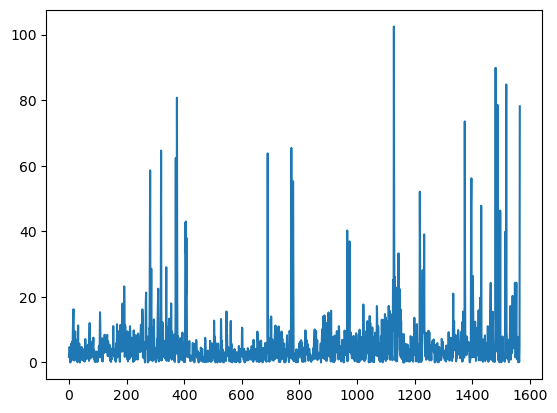

In [303]:
import matplotlib.pyplot as plt
circuit_data['angle']=pd.Series(angle)
angle_plt=circuit_data['angle'].plot()
plt.show()

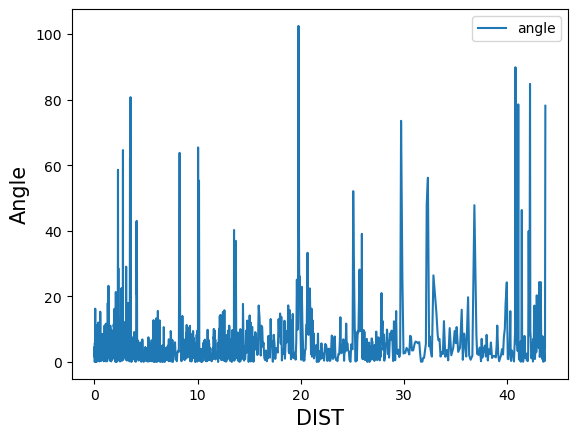

In [304]:
#tkdf2=circuit_data['gradient'].plot()
tkdf1=circuit_data.plot(y='angle',x='DIST')
tkdf1.set_xlabel('DIST',fontsize=15)
tkdf1.set_ylabel('Angle',fontsize=15)
plt.show()
fig = tkdf1.get_figure()
fig.savefig('label_angle.png')

In [306]:
import folium

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
latitude = circuit_data['POSITION'][0][0]
longitude = circuit_data['POSITION'][0][1]

# Loop through the 200 crimes and add each to the incidents feature group
# for lat, lng, in zip(cdata.Y, data.X):
#     incidents.add_child(
#         folium.CircleMarker(
#             [lat, lng],
#             radius=7, # define how big you want the circle markers to be
#             color='yellow',
#             fill=True,
#             fill_color='red',
#             fill_opacity=0.4
#         )
#     )
for i in circuit_data['POSITION']:
     incidents.add_child(
        folium.CircleMarker(
            [i[0], i[1]],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
# Add incidents to map
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)
san_map.add_child(incidents)

In [307]:
gradient=[0]
lst=list(zip(circuit_data['ALT'],circuit_data['DIST']))
for i in range(1,len(lst)):
    gradient.append(((lst[i][0]-lst[i-1][0])/(lst[i][1]-lst[i-1][1]))/1000)
circuit_data['gradient']=gradient
circuit_data

UNIX TIME                  TIME        LAT      LONG     ALT  \
0     1179727200  2007-05-21T06:00:00Z  51.205254  3.217229   8.856   
1     1179727202  2007-05-21T06:00:02Z  51.205307  3.217212   8.931   
2     1179727204  2007-05-21T06:00:04Z  51.205361  3.217192   9.012   
3     1179727207  2007-05-21T06:00:07Z  51.205413  3.217178   9.076   
4     1179727208  2007-05-21T06:00:08Z  51.205445  3.217165   9.124   
...          ...                   ...        ...       ...     ...   
1563  1179742916  2007-05-21T10:21:56Z  51.349217  3.278784  11.092   
1564  1179742931  2007-05-21T10:22:11Z  51.349060  3.278264   9.218   
1565  1179742944  2007-05-21T10:22:24Z  51.348920  3.277805   9.482   
1566  1179742950  2007-05-21T10:22:30Z  51.348866  3.277586   9.973   
1567  1179742962  2007-05-21T10:22:42Z  51.349114  3.277324   6.032   

           DIST  HR  CAD     TEMP    POWER                       POSITION  \
0      0.000000   0    0  No Data  No Data   (51.205254, 3.217229, 8.856)   
1      0.006314   0    0  No Data  No Data   (51.205307, 3.217212, 8.931)   
2      0.012843   0    0  No Data  No Data   (51.205361, 3.217192, 9.012)   
3      0.019185   0    0  No Data  No Data   (51.205413, 3.217178, 9.076)   
4      0.023154   0    0  No Data  No Data   (51.205445, 3.217165, 9.124)   
...         ...  ..  ...      ...      ...                            ...   
1563  43.656780   0    0  No Data  No Data  (51.349217, 3.278784, 11.092)   
1564  43.697160   0    0  No Data  No Data    (51.34906, 3.278264, 9.218)   
1565  43.732620   0    0  No Data  No Data    (51.34892, 3.277805, 9.482)   
1566  43.749090   0    0  No Data  No Data   (51.348866, 3.277586, 9.973)   
1567  43.782400   0    0  No Data  No Data   (51.349114, 3.277324, 6.032)   

                                           xyz_POSITION  \
0     [4003.487276962948, 225.0373313697861, 4988.13...   
1     [4003.48273685998, 225.03588455873575, 4988.13...   
2     [4003.4781216136244, 225.03422324270787, 4988....   
3     [4003.4736566422494, 225.0329909441994, 4988.1...   
4     [4003.4709261865364, 225.0319262381399, 4988.1...   
...                                                 ...   
1563  [3990.7177745475083, 228.62073869809012, 4998....   
1564  [3990.733522727189, 228.58530328473586, 4998.1...   
1565  [3990.747546673915, 228.55403156394345, 4998.1...   
1566  [3990.7531231966814, 228.53904716831153, 4998....   
1567  [3990.7325694118867, 228.51956159668276, 4998....   

                                              DIRECTION  DIRECTION_ANGLE  \
0       (5.300000000119098e-05, -1.700000000015578e-05)        -0.310387   
1      (5.400000000577165e-05, -2.0000000000131024e-05)        -0.354706   
2      (5.199999999661031e-05, -1.3999999999736445e-05)        -0.262995   
3      (3.199999999736747e-05, -1.3000000000040757e-05)        -0.385883   
4      (3.600000000147929e-05, -1.0000000000065512e-05)        -0.270947   
...                                                 ...              ...   
1563  (-0.00015700000000151704, -0.0005199999999998539)         1.277576   
1564  (-0.00014000000000180535, -0.00045900000000020...         1.274749   
1565  (-5.3999999998666226e-05, -0.00021899999999996...         1.329043   
1566    (0.0002479999999991378, -0.0002619999999997624)        -0.812842   
1567       (-0.14386000000000365, -0.06009500000000001)         0.395699   

          WIND      angle  gradient  
0     2.666582   1.701198  0.000000  
1     2.710900   3.489612  0.011879  
2     2.619189   4.705540  0.012405  
3     2.742077   4.407511  0.010092  
4     2.627141   3.598982  0.012095  
...        ...        ...       ...  
1563  2.062974   0.228708 -0.024992  
1564  2.060147   4.485291 -0.046409  
1565  2.114442  78.125542  0.007445  
1566  3.114149        NaN  0.029812  
1567  1.181097        NaN -0.118313  

[1568 rows x 17 columns]

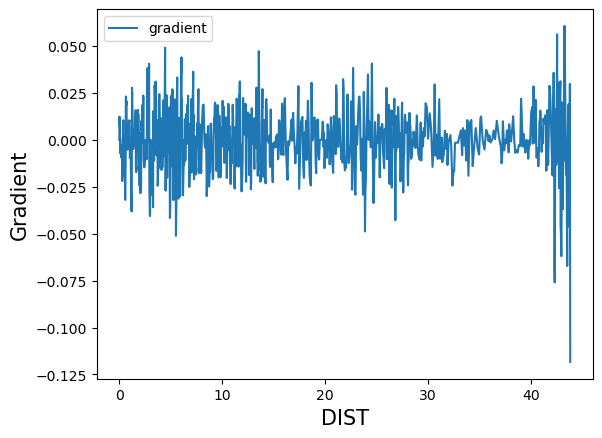

In [308]:
#tkdf2=circuit_data['gradient'].plot()
tkdf2=circuit_data.plot(y='gradient',x='DIST')
tkdf2.set_xlabel('DIST',fontsize=15)
tkdf2.set_ylabel('Gradient',fontsize=15)
plt.show()
fig = tkdf2.get_figure()
fig.savefig('label_gradient.png')

In [315]:
data_root_2=r'E:\2022_MCM\2022_A\2022_A_solution\uci_data2.xlsx'
circuit_data.to_excel(excel_writer=data_root_2, sheet_name='sheet_1')

In [310]:
df=circuit_data[circuit_data['angle']>=60]
df

UNIX TIME                  TIME        LAT      LONG     ALT  \
320   1179728195  2007-05-21T06:16:35Z  51.217442  3.228531   6.359   
371   1179728441  2007-05-21T06:20:41Z  51.221878  3.234065   2.417   
375   1179728460  2007-05-21T06:21:00Z  51.221671  3.234574   2.495   
690   1179730173  2007-05-21T06:49:33Z  51.251522  3.279774   4.224   
772   1179730819  2007-05-21T07:00:19Z  51.265224  3.268558  -0.125   
1128  1179734323  2007-05-21T07:58:43Z  51.224126  3.227564   4.004   
1374  1179737906  2007-05-21T08:58:26Z  51.295110  3.260373   1.917   
1481  1179741900  2007-05-21T10:05:00Z  51.346776  3.284781   8.229   
1488  1179741998  2007-05-21T10:06:38Z  51.346732  3.287987   9.079   
1518  1179742408  2007-05-21T10:13:28Z  51.354555  3.295882  14.750   
1565  1179742944  2007-05-21T10:22:24Z  51.348920  3.277805   9.482   

           DIST  HR  CAD     TEMP    POWER                       POSITION  \
320    2.765488   0    0  No Data  No Data   (51.217442, 3.228531, 6.359)   
371    3.448907   0    0  No Data  No Data   (51.221878, 3.234065, 2.417)   
375    3.501985   0    0  No Data  No Data   (51.221671, 3.234574, 2.495)   
690    8.258365   0    0  No Data  No Data   (51.251522, 3.279774, 4.224)   
772   10.052800   0    0  No Data  No Data  (51.265224, 3.268558, -0.125)   
1128  19.787320   0    0  No Data  No Data   (51.224126, 3.227564, 4.004)   
1374  29.739720   0    0  No Data  No Data    (51.29511, 3.260373, 1.917)   
1481  40.833000   0    0  No Data  No Data   (51.346776, 3.284781, 8.229)   
1488  41.105130   0    0  No Data  No Data   (51.346732, 3.287987, 9.079)   
1518  42.245330   0    0  No Data  No Data   (51.354555, 3.295882, 14.75)   
1565  43.732620   0    0  No Data  No Data    (51.34892, 3.277805, 9.482)   

                                           xyz_POSITION  \
320   [4002.383323589742, 225.76727965712865, 4988.9...   
371   [4001.9758409054857, 226.13206324142595, 4989....   
375   [4001.9918285881945, 226.16863275673342, 4989....   
690   [3999.216470241164, 229.17694139412862, 4991.3...   
772   [3998.0694232822184, 228.3260013993977, 4992.3...   
1128  [4001.8060254334005, 225.66696064552903, 4989....   
1374  [3995.501629084111, 227.60672200163484, 4994.4...   
1481  [3990.906410410059, 229.05063650628273, 4998.0...   
1488  [3990.897419459639, 229.2741684757111, 4998.01...   
1518  [3990.1844658297186, 229.7848512792676, 4998.5...   
1565  [3990.747546673915, 228.55403156394345, 4998.1...   

                                              DIRECTION  DIRECTION_ANGLE  \
320     (-1.699999999971169e-05, 8.900000000000574e-05)        -1.382059   
371    (5.9000000000253294e-05, 0.00020699999999962415)         1.293135   
375     (-0.00010300000000285081, 7.50000000002693e-05)        -0.629373   
690      (0.0003969999999995366, 0.0004939999999997724)         0.893838   
772   (0.00011299999999891952, -0.00015300000000006975)        -0.934656   
1128  (-0.00028100000000108594, -0.0004409999999999137)         1.003480   
1374     (0.0007919999999970173, 0.0012539999999998663)         1.007480   
1481     (0.0003110000000035029, 6.299999999992423e-05)         0.199868   
1488    (7.099999999837792e-05, 0.00046899999999983066)         1.420551   
1518     (0.000256000000000256, -9.199999999998099e-05)        -0.345002   
1565  (-5.3999999998666226e-05, -0.00021899999999996...         1.329043   

          WIND       angle  gradient  
320   0.596660   64.600699  0.025137  
371   1.063060   62.365854  0.025202  
375   0.156025   80.732992 -0.004764  
690   1.462357   63.755078  0.000547  
772   2.992335   65.411531  0.011111  
1128  1.788879  102.459866  0.008034  
1374  1.348714   73.509342  0.019498  
1481  2.156327   89.854344  0.010747  
1488  0.935643   78.537426 -0.001405  
1518  2.701197   84.774242 -0.068386  
1565  2.114442   78.125542  0.007445

In [ ]:
# # add pop-up text to each marker on the map
# latitudes = list(data.Y)
# longitudes = list(data.X)
# labels = list(data.Category)

# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(san_map)    
    
# # add incidents to map
# san_map.add_child(incidents)


In [311]:
for lat, lng ,alt in df['POSITION']:
    folium.Marker([lat, lng], popup="sharp turns").add_to(san_map)
san_map

In [312]:
df2=circuit_data[circuit_data['gradient']>=0.0349]
df3=circuit_data[circuit_data['gradient']<=-0.0349]
df3


UNIX TIME                  TIME        LAT      LONG     ALT  \
172   1179727622  2007-05-21T06:07:02Z  51.214683  3.215670   5.566   
173   1179727624  2007-05-21T06:07:04Z  51.214756  3.215704   5.232   
174   1179727627  2007-05-21T06:07:07Z  51.214804  3.215741   4.995   
175   1179727629  2007-05-21T06:07:09Z  51.214845  3.215785   4.779   
176   1179727632  2007-05-21T06:07:12Z  51.214909  3.215841   4.450   
332   1179728266  2007-05-21T06:17:46Z  51.218949  3.229536   7.098   
333   1179728271  2007-05-21T06:17:51Z  51.219072  3.229580   6.506   
334   1179728276  2007-05-21T06:17:56Z  51.219181  3.229635   6.000   
356   1179728380  2007-05-21T06:19:40Z  51.220831  3.232393   1.260   
457   1179728968  2007-05-21T06:29:28Z  51.229263  3.249733   6.266   
458   1179728975  2007-05-21T06:29:35Z  51.229380  3.249970   5.451   
459   1179728980  2007-05-21T06:29:40Z  51.229455  3.250125   4.930   
487   1179729179  2007-05-21T06:32:59Z  51.232562  3.256088   4.927   
488   1179729182  2007-05-21T06:33:02Z  51.232620  3.256191   4.462   
489   1179729187  2007-05-21T06:33:07Z  51.232693  3.256329   3.931   
1199  1179735787  2007-05-21T08:23:07Z  51.258268  3.216995   1.847   
1289  1179736848  2007-05-21T08:40:48Z  51.278288  3.231007   2.268   
1518  1179742408  2007-05-21T10:13:28Z  51.354555  3.295882  14.750   
1519  1179742419  2007-05-21T10:13:39Z  51.354811  3.295790  12.454   
1538  1179742625  2007-05-21T10:17:05Z  51.353200  3.288047  15.054   
1539  1179742636  2007-05-21T10:17:16Z  51.353122  3.287616  13.498   
1540  1179742644  2007-05-21T10:17:24Z  51.353058  3.287320  12.163   
1541  1179742656  2007-05-21T10:17:36Z  51.352980  3.286837  10.027   
1546  1179742706  2007-05-21T10:18:26Z  51.352370  3.285098   9.864   
1557  1179742845  2007-05-21T10:20:45Z  51.350078  3.281306  12.980   
1558  1179742855  2007-05-21T10:20:55Z  51.349956  3.280911  10.928   
1564  1179742931  2007-05-21T10:22:11Z  51.349060  3.278264   9.218   
1567  1179742962  2007-05-21T10:22:42Z  51.349114  3.277324   6.032   

           DIST  HR  CAD     TEMP    POWER                       POSITION  \
172    1.171108   0    0  No Data  No Data    (51.214683, 3.21567, 5.566)   
173    1.179965   0    0  No Data  No Data   (51.214756, 3.215704, 5.232)   
174    1.186293   0    0  No Data  No Data   (51.214804, 3.215741, 4.995)   
175    1.192172   0    0  No Data  No Data   (51.214845, 3.215785, 4.779)   
176    1.200801   0    0  No Data  No Data    (51.214909, 3.215841, 4.45)   
332    2.961794   0    0  No Data  No Data   (51.218949, 3.229536, 7.098)   
333    2.976368   0    0  No Data  No Data    (51.219072, 3.22958, 6.506)   
334    2.989426   0    0  No Data  No Data     (51.219181, 3.229635, 6.0)   
356    3.278003   0    0  No Data  No Data    (51.220831, 3.232393, 1.26)   
457    4.910138   0    0  No Data  No Data   (51.229263, 3.249733, 6.266)   
458    4.931468   0    0  No Data  No Data     (51.22938, 3.24997, 5.451)   
459    4.945701   0    0  No Data  No Data    (51.229455, 3.250125, 4.93)   
487    5.496690   0    0  No Data  No Data   (51.232562, 3.256088, 4.927)   
488    5.506778   0    0  No Data  No Data    (51.23262, 3.256191, 4.462)   
489    5.519641   0    0  No Data  No Data   (51.232693, 3.256329, 3.931)   
1199  23.853430   0    0  No Data  No Data   (51.258268, 3.216995, 1.847)   
1289  26.801980   0    0  No Data  No Data   (51.278288, 3.231007, 2.268)   
1518  42.245330   0    0  No Data  No Data   (51.354555, 3.295882, 14.75)   
1519  42.275570   0    0  No Data  No Data   (51.354811, 3.29579, 12.454)   
1538  42.846660   0    0  No Data  No Data    (51.3532, 3.288047, 15.054)   
1539  42.877750   0    0  No Data  No Data  (51.353122, 3.287616, 13.498)   
1540  42.899490   0    0  No Data  No Data   (51.353058, 3.28732, 12.163)   
1541  42.933950   0    0  No Data  No Data   (51.35298, 3.286837, 10.027)   
1546  43.073230   0    0  No Data  No Data    (51.35237, 3.285098, 9.864)   
1557  43.457380   0   

In [313]:
for i in df2['POSITION']:
     incidents.add_child(
        folium.CircleMarker(
            [i[0], i[1]],
            radius=2, # define how big you want the circle markers to be
            color='orange',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
# Add incidents to map
#san_map = folium.Map(location=[latitude, longitude], zoom_start=12)
san_map.add_child(incidents)

In [314]:
for i in df3['POSITION']:
     incidents.add_child(
        folium.CircleMarker(
            [i[0], i[1]],
            radius=2, # define how big you want the circle markers to be
            color='purple',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
# Add incidents to map
#san_map = folium.Map(location=[latitude, longitude], zoom_start=12)
san_map.add_child(incidents)

In [254]:
import webbrowser
san_map.save("1.html")
webbrowser.open("1.html")

True